In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Data Link: 

# https://archive.ics.uci.edu/ml/datasets/iris

# or use sklearn.datasets.load_iris()

In [18]:
# Load the Iris dataset
iris = load_iris()
X = iris.data[:, [2, 3]]  # Using petal length and width for 2D visualization
feature_names = ['Petal Length (cm)', 'Petal Width (cm)']

print("Dataset Overview")
print(f"Number of samples: {X.shape[0]}")
print(f"Features used: {feature_names}")
print(f"\nFirst 5 samples:\n{X[:5]}")



Dataset Overview
Number of samples: 150
Features used: ['Petal Length (cm)', 'Petal Width (cm)']

First 5 samples:
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


In [19]:
# Standardize features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)


[[-1.34022653e+00 -1.31544430e+00]
 [-1.34022653e+00 -1.31544430e+00]
 [-1.39706395e+00 -1.31544430e+00]
 [-1.28338910e+00 -1.31544430e+00]
 [-1.34022653e+00 -1.31544430e+00]
 [-1.16971425e+00 -1.05217993e+00]
 [-1.34022653e+00 -1.18381211e+00]
 [-1.28338910e+00 -1.31544430e+00]
 [-1.34022653e+00 -1.31544430e+00]
 [-1.28338910e+00 -1.44707648e+00]
 [-1.28338910e+00 -1.31544430e+00]
 [-1.22655167e+00 -1.31544430e+00]
 [-1.34022653e+00 -1.44707648e+00]
 [-1.51073881e+00 -1.44707648e+00]
 [-1.45390138e+00 -1.31544430e+00]
 [-1.28338910e+00 -1.05217993e+00]
 [-1.39706395e+00 -1.05217993e+00]
 [-1.34022653e+00 -1.18381211e+00]
 [-1.16971425e+00 -1.18381211e+00]
 [-1.28338910e+00 -1.18381211e+00]
 [-1.16971425e+00 -1.31544430e+00]
 [-1.28338910e+00 -1.05217993e+00]
 [-1.56757623e+00 -1.31544430e+00]
 [-1.16971425e+00 -9.20547742e-01]
 [-1.05603939e+00 -1.31544430e+00]
 [-1.22655167e+00 -1.31544430e+00]
 [-1.22655167e+00 -1.05217993e+00]
 [-1.28338910e+00 -1.31544430e+00]
 [-1.34022653e+00 -1

In [20]:
# Apply K-Means with K=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled) # Cluster Labels =>  Which cluster each point belongs to
print(clusters)


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [21]:
# The Problem: After clustering, centroids are in standardized scale
# The Solution: Convert back to original scale
# Get cluster centers (transform back to original scale)
centers = scaler.inverse_transform(kmeans.cluster_centers_) # coordinates
print(centers)


[[5.56666667 2.05625   ]
 [1.462      0.246     ]
 [4.29615385 1.325     ]]


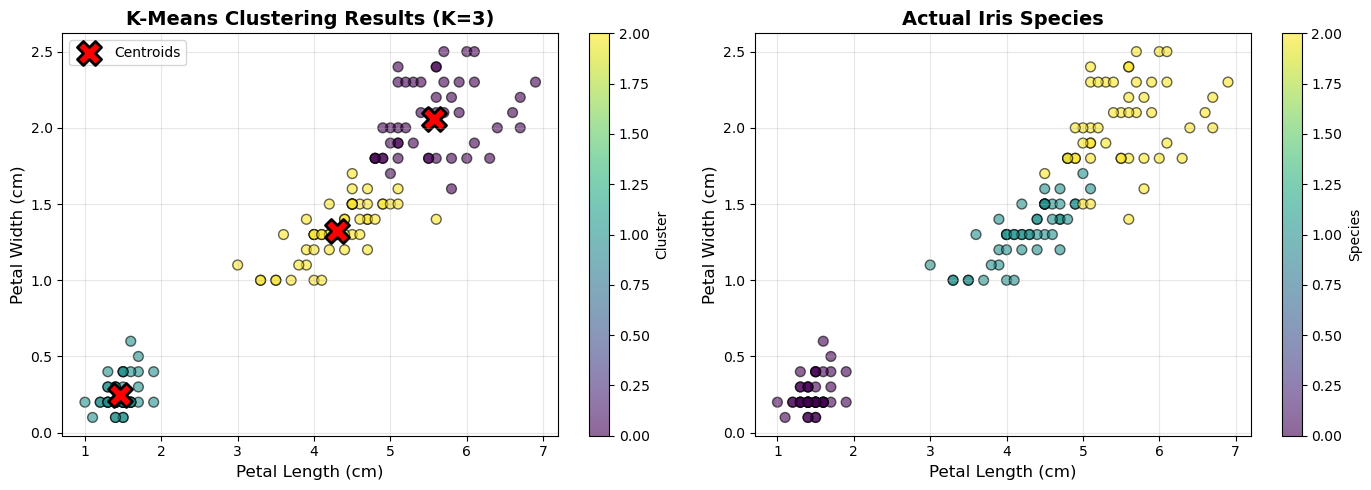

In [22]:
# Visualization

# Line 1 : 
    # `axes[0]` | First subplot | Draw on the left plot | Left side of figure 
    # `X[:, 0]` | First column | X-axis: Petal Length | [1.4, 1.4, 1.3, ...] 
    # `X[:, 1]` | Second column | Y-axis: Petal Width | [0.2, 0.2, 0.2, ...] |
    # `c=clusters` | Color by cluster | Each cluster gets a color | [0→purple, 1→green, 2→yellow] 
    # `cmap='viridis'` | Color scheme | Purple to yellow gradient | Professional color map 
    # `s=50` | Size = 50 | Point size in pixels | Medium-sized dots 
    # `alpha=0.6` | Transparency = 60% | Semi-transparent | Can see overlapping points 
    # `edgecolors='black'` | Black borders | Black outline around points | Makes points stand out 

# Line 2
    # `centers[:, 0]` | Centroid X coords | Petal length of centers | [1.5, 4.3, 5.6] 
    # `centers[:, 1]` | Centroid Y coords | Petal width of centers | [0.3, 1.3, 2.0] 
    # `c='red'` | Red color | All centroids are red | Easy to spot 
    # `marker='X'` | X-shaped marker | Cross shape | Different from dots 
    # `s=300` | Size = 300 | Much larger than points | Very visible 
    # `edgecolors='black'` | Black border | Black outline | Stands out more 
    # `linewidths=2` | Border width = 2 | Thick border | More prominent 
    # `label='Centroids'` | Legend label | Shows in legend | Explains what X means 



fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Original data with K-Means clusters
scatter1 = axes[0].scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.6, edgecolors='black')
axes[0].scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=300, edgecolors='black', linewidths=2, label='Centroids')
axes[0].set_xlabel(feature_names[0], fontsize=12)
axes[0].set_ylabel(feature_names[1], fontsize=12)
axes[0].set_title('K-Means Clustering Results (K=3)', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Actual species (ground truth for comparison)
scatter2 = axes[1].scatter(X[:, 0], X[:, 1], c=iris.target, cmap='viridis', 
                           s=50, alpha=0.6, edgecolors='black')
axes[1].set_xlabel(feature_names[0], fontsize=12)
axes[1].set_ylabel(feature_names[1], fontsize=12)
axes[1].set_title('Actual Iris Species', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.colorbar(scatter1, ax=axes[0], label='Cluster')
plt.colorbar(scatter2, ax=axes[1], label='Species')
plt.tight_layout()
plt.show()



In [23]:
# Print cluster statistics
print("\n" + "="*60)
print("CLUSTERING RESULTS")
print("="*60)
print(f"\nInertia (WCSS): {kmeans.inertia_:.2f}")
print(f"Number of iterations: {kmeans.n_iter_}")

print("\nCluster Centers (Original Scale):")
for i, center in enumerate(centers):
    print(f"  Cluster {i}: Petal Length={center[0]:.2f}cm, Petal Width={center[1]:.2f}cm")

print("\nCluster Sizes:")
unique, counts = np.unique(clusters, return_counts=True)
for cluster_id, count in zip(unique, counts):
    print(f"  Cluster {cluster_id}: {count} samples ({count/len(clusters)*100:.1f}%)")

# Calculate cluster characteristics
print("\nCluster Characteristics (Mean values):")
for i in range(3):
    cluster_points = X[clusters == i]
    print(f"\n  Cluster {i}:")
    print(f"    Avg Petal Length: {cluster_points[:, 0].mean():.2f} cm")
    print(f"    Avg Petal Width: {cluster_points[:, 1].mean():.2f} cm")
    print(f"    Interpretation: ", end="")
    if cluster_points[:, 0].mean() < 2:
        print("Small petals (likely Setosa)")
    elif cluster_points[:, 0].mean() < 5:
        print("Medium petals (likely Versicolor)")
    else:
        print("Large petals (likely Virginica)")


CLUSTERING RESULTS

Inertia (WCSS): 18.03
Number of iterations: 6

Cluster Centers (Original Scale):
  Cluster 0: Petal Length=5.57cm, Petal Width=2.06cm
  Cluster 1: Petal Length=1.46cm, Petal Width=0.25cm
  Cluster 2: Petal Length=4.30cm, Petal Width=1.32cm

Cluster Sizes:
  Cluster 0: 48 samples (32.0%)
  Cluster 1: 50 samples (33.3%)
  Cluster 2: 52 samples (34.7%)

Cluster Characteristics (Mean values):

  Cluster 0:
    Avg Petal Length: 5.57 cm
    Avg Petal Width: 2.06 cm
    Interpretation: Large petals (likely Virginica)

  Cluster 1:
    Avg Petal Length: 1.46 cm
    Avg Petal Width: 0.25 cm
    Interpretation: Small petals (likely Setosa)

  Cluster 2:
    Avg Petal Length: 4.30 cm
    Avg Petal Width: 1.33 cm
    Interpretation: Medium petals (likely Versicolor)
